# Семинар 19
# Оптимизация на множествах простой структуры

## На прошлом семинаре...

- История линейного программирования
- Концепция методов внутренней точки
- Прямой барьерный метод


## Методы решения каких задач уже известны

- Безусловная минимизация: функция достаточно гладкая, но ограничений на аргумент нет.
- Линейное программирование: линейная функция при линейных ограничениях

Следующий шаг: произвольная достаточно гладкая функция на достаточно простом множестве - не обязательно полиэдральном.

## Что такое "простое множество"?


**Определение.** Множество будем называть *простым*, если проекцию на него можно найти существенно быстрее (чаще всего аналитически) по сравнению с решением исходной задачи минимизации.

## Примеры простых множеств

- Полиэдр $Ax = b, Cx \leq d$
    - аффинное множество
    - гиперплоскость
    - полупространство
    - отрезок, интервал, полуинтервал
    - симплекс
- Конусы
    - положительный ортант
    - Лоренцев конус
    - $\mathbb{S}^n_{+}$
    
**Замечание:** убедитесь, что Вы понимаете, что стоит за этими названиями и обозначениями!

## Напоминание: как искать проекцию?
Для данной точки $y \in \mathbb{R}^n$ требуется решить следующую задачу
$$
\min_{x \in P} \|x - y \|_2
$$
Обозначение: $\pi_P(y)$ - проекция точки $y$ на множество $P$.

## Примеры проекций

- Отрезок $P = \{x | l \leq x \leq u \}$
$$
(\pi_P(y))_k = 
\begin{cases}
u_k & y_k \geq u_k \\
l_k & y_k \leq l_k \\
y_k & \text{otherwise.}
\end{cases}
$$

- Аффинное множество $P = \{ x| Ax = b \}$
$$
\pi_P(y) = y - A^+(Ay - b),
$$ 
где $A^+$ - псевдообратная матрица. Если $A$ полного ранга и столбцы линейно-независимы, тогда $A^+ = (A^{\top}A)^{-1}A^{\top}$.

- Конус положительно полуопределённых матриц $P = \mathbb{S}^n_+ = \{X \in \mathbb{R}^{n \times n} | X \succeq 0, \; X^{\top} = X \}$
$$
\pi_P(Y) = \prod_{i=1}^n (\lambda_i)_+ v_i v_i^{\top},
$$
где $(\lambda_i, v_i)$ - пары собственных значений и векторов матрицы $Y$. 

## Метод проекции градиента

$$
\min_{x \in P} f(x)
$$
**Идея**: делать шаг градиентного спуска и проецировать полученную точку на допустимое множество $P$.

## Псевдокод

```python
def ProjectedGradientDescent(f, gradf, proj, x0, tol):
    x = x0
    while True:
        gradient = gradf(x)
        alpha = get_step_size(x, f, gradf, proj)
        x = proj(x - alpha * grad)
        if check_convergence(x, f, tol):
            break
    return x
```

## Поиск шага

- Постоянный шаг: $\alpha_k = \alpha$, где $\alpha$ достаточно мало
- Наискорейший спуск: 
$$
\min_{\alpha > 0} f(x_k(\alpha))
$$
$x_k(\alpha) = \pi_P (x_k - \alpha f'(x_k))$
- Линейный поиск: уменьшать шаг по правилу Армихо, пока не будет выполнено условие
$$
f(x_k(\alpha)) - f(x_k) \leq c_1 \langle f'(x_k), x_k(\alpha) - x_k \rangle
$$

## Теорема сходимости (Б.Т. Поляк "Введение в оптимизацию", гл. 7, $\S$ 2)

**Теорема.** Пусть $f$ выпуклая дифференцируемая функция и её градиент липшицев на $P$ с константой $L$. Пусть $P$ выпуклое и замкнутое множество и $0 < \alpha < 2 / L$. 

Тогда
- $x_k \to x^*$
- если $f$ сильно выпуклая, то $x_k \to x^*$ со скоростью геометрической прогрессии
- если $f$ дважды дифференцируема и $f''(x) \succeq l\mathbf{I}, \; x \in P$, $l > 0$, то знаменатель прогрессии $q = \max \{ |1 - \alpha l|, |1 - \alpha L|\}$.

## Критерии остановки
- Сходимость по аргументу, то есть сходимость последовательности $x_k$ к предельной точке $x^*$
- $x_k = x^*$ если $x_k = \pi_P(x_{k+1})$

**Важное замечание:** проверять норму градиента бессмысленно, так как это условная оптимизация!

## Аффинная инвариантность

**Упражнение.** Проверьте является ли метод проекции градиента аффинно инвариантным.

## Pro & Contra

Pro
- часто можно аналитически вычислить проекцию
- сходимость аналогична градиентному спуску в безусловной оптимизации
- обобщается на негладкий случай - метод проекции субградиента

Contra
- при больших $n$ аналитическое вычисление проекции может быть слишком затратно: $O(n)$ для симплекса vs. решение задачи квадратичного программирования для полиэдрального множества
- при обновлении градиента может теряться структура задачи: разреженность, малоранговость...

## Что такое "простое множество"?

**Определение.** Множество $D$ будем называть *простым*, если можно найти решение следующей задачи
$$
\min_{x \in D} c^{\top}x
$$
существенно быстрее (чаще всего аналитически) по сравнению с решением исходной задачи минимизации.

## Примеры простых множеств

- Полиэдральное множество - задача линейного программирования вместо квадратичного программирования
- Симплекс - $x^* = e_i$, где $c_i = \max\limits_{k = 1,\ldots, n} c_k$
- Лоренцев конус - $x^* = -\frac{ct}{\| c\|_2}$
- Все остальные множества из предыдущего определения

**Замечание 1:** отличие этого определения от предыдущего в линейности целевой функции (была квадратичная), поэтому простых множеств для этого определения больше.

**Замечание 2:** иногда на допустимое множество легко найти проекцию, но задача линейного программирования является неограниченной. Например, для множества 
$$
D = \{ x \in \mathbb{R}^n \; | \; x_i \geq 0 \},
$$ 
проекция на которое очевидна, решение задачи линейного программирования равно $-\infty$, если есть хотя бы одна отрицательная компонента вектора $c$. Теорема с объяснением будет ниже.

## Метод условного градиента <br> (aka Frank-Wolfe algorithm (1956))

$$
\min_{x \in D} f(x)
$$

**Идея**: делать шаг не по градиенту, а по направлению, которое точно не выведет из допустимого множества.

Аналогия с градиентным спуском: линейная аппроксимация **на допустимом множестве**:
$$
f(x_k + s_k) = f(x_k) + \langle f'(x_k), s_k \rangle \to \min_{{\color{red}{s_k \in D}}}
$$

## Условный градиент

**Определение** Направление $s_k - x_k$ называют *условным градиентом* функции $f$ в точке $x_k$ на допустимом множестве $D$.

## Псевдокод
```python
def FrankWolfe(f, gradf, linprogsolver, x0, tol):
    x = x0
    while True:
        gradient = gradf(x)
        s = linprogsolver(gradient)
        alpha = get_step_size(s, x, f)
        x = x + alpha * (s - x)
        if check_convergence(x, f, tol):
            break
    return x
```

## Выбор шага

- Постоянный шаг: $\alpha_k = \alpha$
- Убывающая последовательность, стандартный выбор $\alpha_k = \frac{2}{k + 2}$
- Наискорейший спуск:
$$
\min_{{\color{red}{0 \leq \alpha_k \leq 1}}} f(x_k + \alpha_k(s_k - x_k))
$$
- Линейный поиск по правилу Армихо: должно выполняться условие
$$
f((x_k + \alpha_k(s_k - x_k)) \leq f(x_k) + c_1 \alpha_k \langle f'(x_k), s_k - x_k \rangle
$$
Начинать поиск нужно с $\alpha_k = 1$

## Критерий остановки

- Так как показана сходимость к предельной точке $x^*$, то критерием остановки является сходимость по аргументу
- Если $f(x)$ выпукла, то $f(s) \geq f(x_k) + \langle f'(x_k), s - x_k \rangle$ для любого вектора $s$, а значит и для любого $s \in D$. Следовательно

$$
f(x^*) \geq f(x) + \min_{s \in D} \langle f'(x), s - x\rangle
$$

или
 
$$
f(x) - f(x^*) \leq -\min_{s \in D} \langle f'(x), s - x\rangle = \max_{s \in D} \langle f'(x), x - s\rangle = g(x)
$$
Получили аналог зазора двойственности для контроля точности и устойчивости решения.

## Аффинная инвариантность

- Метод условного градиента является аффинно инвариантным относительно сюръективных отображений
- Скорость сходимости и вид итерации не меняется

## Теорема сходимости (лекции)

**Теорема 4.2.1.** Пусть $X$ - **выпуклый компакт** и $f(x)$ - дифференцируемая функция на $X$ с Липшицевым градиентом. Шаг выбирается по правилу Армихо. Тогда **для любого ${\color{red}{x_0 \in X}}$ **
- метод условного градиента генерирует последовательность $\{x_k\}$, которая имеет предельные точки
- любая предельная точка $x^*$ является **стационарной**
- если $f(x)$ выпукла на $X$, то $x^*$ - решение задачи

## Теоремы сходимости

**Теорема (прямая).([Convex Optimization: Algorithms and Complexity, Th 3.8.](https://arxiv.org/abs/1405.4980))** Пусть $f$ выпуклая и дифференцируемая функция и её градиент Липшицев с константой $L$. Множество $X$ - выпуклый компакт диаметра $d > 0$. 
Тогда метод условного градиента с шагом $\alpha_k = \frac{2}{k + 1}$ сходится как
$$
f(x^*) - f(x_k) \leq \dfrac{2d^2L}{k + 2}, \quad k \geq 1
$$

**Теорема (двойственная) [см. эту статью](http://m8j.net/math/revisited-FW.pdf).** После выполнения $K$ итераций метода условного градиента для выпуклой и непрерывно дифференцируемой функции для функции $g$ и любого $k \leq K$ выполнено
$$
g(x_k) \leq \frac{2\beta C_f}{K+2} (1 + \delta),
$$
где $\beta \approx 3$, $\delta$ - точность решения промежуточных задач, $C_f$ - оценка кривизны $f$ на множестве $D$
$$
C_f = \sup_{x, s \in D; \gamma \in [0,1]} \frac{2}{\gamma^2}\left(f(x + \gamma(s - x)) - f(x) - \langle \gamma(s - x), f'(x)\rangle\right)
$$

Аргумент супремума так же известен как *дивергенция Брегмана*.

## Как конструктивно задать "простые" множества?

**Определение**. Atomic norm называется следующая функция 

$$
\|x\|_{\mathcal{D}} = \inf_{t \geq 0} \{ t | x \in t\mathcal{D} \}
$$

Она является нормой, если симметрична и $0 \in \mathrm{int}(\mathcal{D})$

### Сопряжённая atomic norm
$$
\|y\|^*_{\mathcal{D}} = \sup_{s \in \mathcal{D}} \langle s, y \rangle
$$

- Из определения выпуклой оболочки следует, что линейная функция достигает максимума в одной из "вершин" выпуклого множества
- Следовательно, $\| y \|^*_{\mathcal{D}} = \| y \|^*_{\mathrm{conv}(\mathcal{D})}$
- Это позволяет эффективно вычислять решение промежуточных задач для определения $s$

<img src="atomic_table.png">
Таблица взята из [статьи](http://m8j.net/math/revisited-FW.pdf)

## Разреженность vs. точность

- Метод условного градиента на каждой итерации добьавляет к решению слагаемое, являющееся элементом множества $\mathcal{A}$
- Решение моджет быть представлено в виде комбинации элементов $\mathcal{A}$
- Теорема Каратеодори
- Число элементов может быть существенно маньше требуемого теоремой Каратеодори

## Эксперименты

## Пример 1

\begin{equation*}
\begin{split}
& \min \frac{1}{2}\|Ax - b \|^2_2\\
\text{s.t. } & 0 \leq x_i \leq 1
\end{split}
\end{equation*}

In [1]:
def func(x, A, b):
    return 0.5 * np.linalg.norm(A.dot(x) - b)**2

f = lambda x: func(x, A, b)

def grad_f(x, A, b):
    grad = -A.T.dot(b)
    grad = grad + A.T.dot(A.dot(x))
    return grad

grad = lambda x: grad_f(x, A, b)

In [2]:
def linsolver(gradient):
    x = np.zeros(gradient.shape[0])
    pos_grad = gradient > 0
    neg_grad = gradient < 0
    x[pos_grad] = np.zeros(np.sum(pos_grad == True))
    x[neg_grad] = np.ones(np.sum(neg_grad == True))
    return x

In [3]:
def projection(y):
    return np.clip(y, 0, 1)

In [4]:
import liboptpy.constr_solvers as cs
import liboptpy.step_size as ss
import numpy as np
from tqdm import tqdm

n = 200
m = 100
A = np.random.randn(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true) + 0.01 * np.random.randn(m)

In [5]:
def myplot(x, y, xlab, ylab, xscale="linear", yscale="log"):
    plt.figure(figsize=(10, 8))
    plt.xscale(xscale)
    plt.yscale(yscale)
    for key in y:
        plt.plot(x[key], y[key], label=key)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(loc="best", fontsize=24)
    plt.xlabel(xlab, fontsize=24)
    plt.ylabel(ylab, fontsize=24)

In [6]:
x0 = np.random.rand(n)
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_cg = cg.solve(x0=x0, max_iter=200, tol=1e-10, disp=1)
print("Optimal value CG =", f(x_cg))

Convergence in 183 iterations
Function value = 2.1767788576659386e-09
Difference in function values = 8.828102439733807e-11
Difference in argument = 2.833713993344139e-06
Optimal value CG = 2.1767788576659386e-09


In [7]:
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_pg = pg.solve(x0=x0, max_iter=200, tol=1e-10, disp=1)
print("Optimal value PG =", f(x_pg))

Convergence in 61 iterations
Function value = 1.2657215268393827e-10
Difference in function values = 1.9511761669947454e-11
Difference in argument = 4.409104752657129e-07
Optimal value PG = 1.2657215268393827e-10


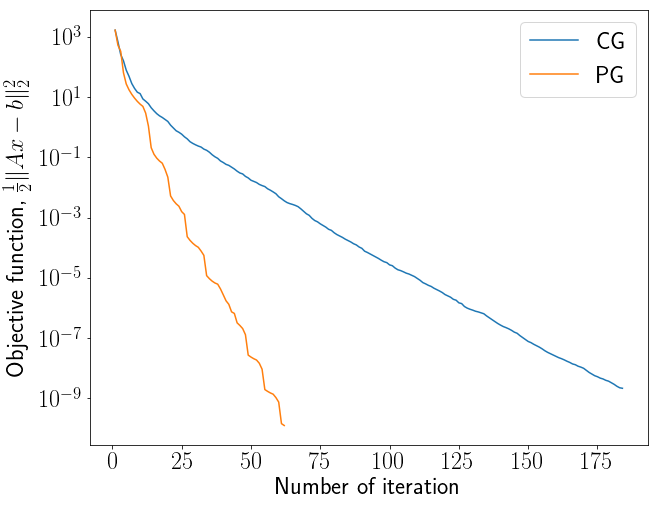

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)
y_hist_f_cg = [f(x) for x in cg.get_convergence()]
y_hist_f_pg = [f(x) for x in pg.get_convergence()]
myplot({"CG": range(1, len(y_hist_f_cg) + 1), "PG": range(1, len(y_hist_f_pg) + 1)},
       {"CG": y_hist_f_cg, "PG": y_hist_f_pg}, "Number of iteration",
       r"Objective function, $\frac{1}{2}\|Ax - b\|^2_2$")

In [9]:
import cvxpy as cvx

x = cvx.Variable(n)
obj = cvx.Minimize(0.5 * cvx.norm(A * x - b, 2)**2)
constr = [x >= 0, x <= 1]
problem = cvx.Problem(objective=obj, constraints=constr)
value = problem.solve()
x_cvx = np.array(x.value).ravel()
print("CVX optimal value =", value)

CVX optimal value = 5.846140959946567e-14


### Зависимость времени и числа итераций от точности

In [11]:
eps = [10**(-i) for i in range(8)]
time_pg = np.zeros(len(eps))
time_cg = np.zeros(len(eps))
iter_pg = np.zeros(len(eps))
iter_cg = np.zeros(len(eps))
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
for i, tol in tqdm(enumerate(eps)):
    res = %timeit -o -q pg.solve(x0=x0, tol=tol, max_iter=100000)
    time_pg[i] = res.average
    iter_pg[i] = len(pg.get_convergence())
    res = %timeit -o -q cg.solve(x0=x0, tol=tol, max_iter=100000)
    time_cg[i] = res.average
    iter_cg[i] = len(cg.get_convergence())

8it [01:33, 11.70s/it]


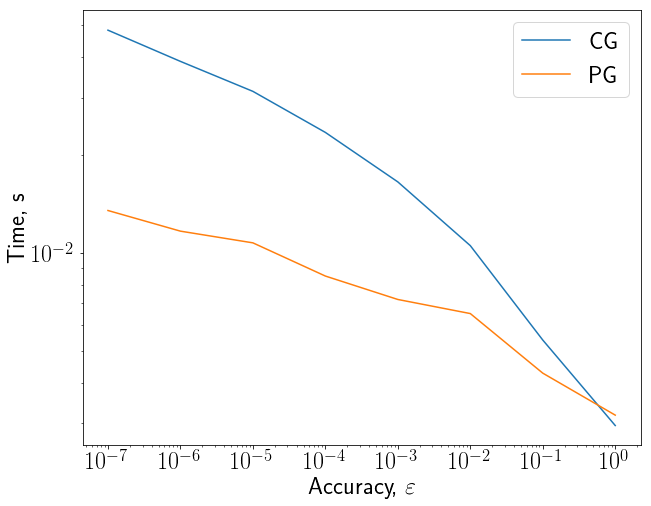

In [12]:
myplot({"CG":eps, "PG": eps}, {"CG": time_cg, "PG": time_pg}, r"Accuracy, $\varepsilon$", "Time, s", xscale="log")

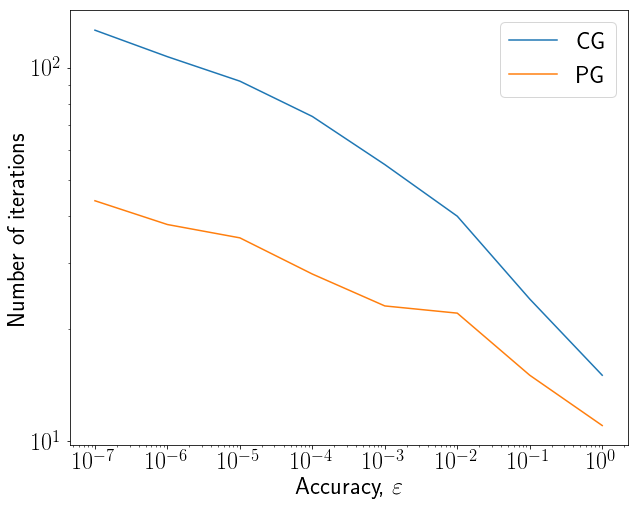

In [13]:
myplot({"CG":eps, "PG": eps}, {"CG": iter_cg, "PG": iter_pg}, r"Accuracy, $\varepsilon$", "Number of iterations", xscale="log")

## Пример 2
 Рассмотрим задачу: 
\begin{equation*}
\begin{split}
& \min \frac{1}{2}\|Ax - b \|^2_2 \\
\text{s.t. } & \| x\|_1 \leq 1 \\
& x_i \geq 0
\end{split}
\end{equation*}

In [14]:
def linsolver(gradient):
    x = np.zeros(gradient.shape[0])
    idx_min = np.argmin(gradient)
    if gradient[idx_min] > 0:
        x[idx_min] = 0
    else:
        x[idx_min] = 1
    return x

In [15]:
def projection(y):
    x = y.copy()
    if np.all(x >= 0) and np.sum(x) <= 1:
        return x
    x = np.clip(x, 0, np.max(x))
    if np.sum(x) <= 1:
        return x
    n = x.shape[0]
    bget = False
    x.sort()
    x = x[::-1]
    temp_sum = 0
    t_hat = 0
    for i in range(n - 1):
        temp_sum += x[i]
        t_hat = (temp_sum - 1.0) / (i + 1)
        if t_hat >= x[i + 1]:
            bget = True
            break
    if not bget:
        t_hat = (temp_sum + x[n - 1] - 1.0) / n
    return np.maximum(y - t_hat, 0)

In [30]:
x0 = np.random.rand(n) * 10
x0 = x0 / x0.sum()
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_cg = cg.solve(x0=x0, max_iter=200, tol=1e-10)
print("Optimal value CG =", f(x_cg))

Optimal value CG = 3007.501708711499


In [31]:
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_pg = pg.solve(x0=x0, max_iter=200, tol=1e-10)
print("Optimal value PG =", f(x_pg))

Optimal value PG = 3007.5017087083984


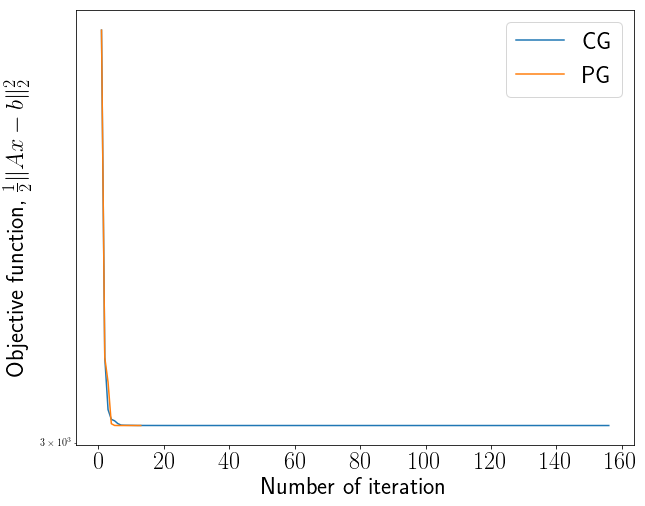

In [32]:
y_hist_f_cg = [f(x) for x in cg.get_convergence()]
y_hist_f_pg = [f(x) for x in pg.get_convergence()]
myplot({"CG": range(1, len(y_hist_f_cg) + 1), "PG": range(1, len(y_hist_f_pg) + 1)},
       {"CG": y_hist_f_cg, "PG": y_hist_f_pg}, "Number of iteration",
       r"Objective function, $\frac{1}{2}\|Ax - b\|^2_2$")

### Зависимость времени и числа итераций от точности

In [22]:
eps = [10**(-i) for i in range(8)]
time_pg = np.zeros(len(eps))
time_cg = np.zeros(len(eps))
iter_pg = np.zeros(len(eps))
iter_cg = np.zeros(len(eps))
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
for i, tol in tqdm(enumerate(eps)):
    res = %timeit -o -q pg.solve(x0=x0, tol=tol, max_iter=100000)
    time_pg[i] = res.average
    iter_pg[i] = len(pg.get_convergence())
    res = %timeit -o -q cg.solve(x0=x0, tol=tol, max_iter=100000)
    time_cg[i] = res.average
    iter_cg[i] = len(cg.get_convergence())

8it [01:19,  9.95s/it]


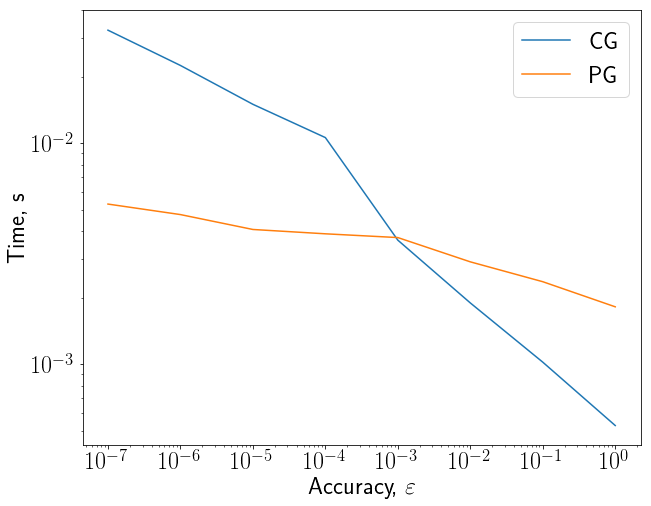

In [23]:
myplot({"CG":eps, "PG": eps}, {"CG": time_cg, "PG": time_pg}, 
       r"Accuracy, $\varepsilon$", "Time, s", xscale="log")

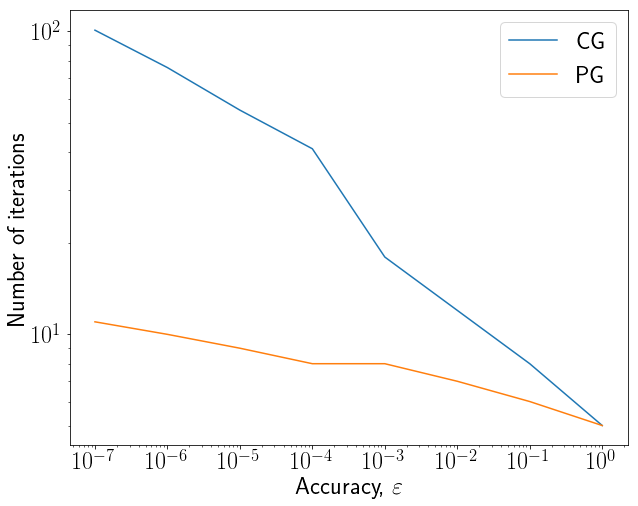

In [24]:
myplot({"CG":eps, "PG": eps}, {"CG": iter_cg, "PG": iter_pg}, 
       r"Accuracy, $\varepsilon$", "Number of iterations", xscale="log")

In [25]:
x = cvx.Variable(n)
obj = cvx.Minimize(0.5 * cvx.norm2(A * x - b)**2)
constr = [cvx.norm(x, 1) <= 1, x >= 0]
problem = cvx.Problem(objective=obj, constraints=constr)
value = problem.solve()
x_cvx = np.array(x.value).ravel()
print("CVX optimal value =", value)

CVX optimal value = 3007.501670877276


## Pro & Contra

Pro
- Оценка сходимости для функционала **не зависит** от размерности
- Если множество - многоугольник, то $x_k$ - выпуклая комбинация $k$ вершин многоугольника - разреженная решение для $k \ll n$
- Если множество выпуклая комбинация некоторых элементов, то решение - линейная комбинация подмножества этих элементов
- Сходимость по функционалу не улучшаема даже для сильно выпуклых функций
- Упрощение понятия "простое множество"
- Существует подобие зазора двойственности и теоретические результаты о сходимости

Contra
- Сходимость по функционалу только сублинейная вида $\frac{C}{k}$
- Не обобщается на негладкие задачи

## Резюме
- Множество простой структуры
- Проекция
- Метод проекции градиента
- Метод условного градиента